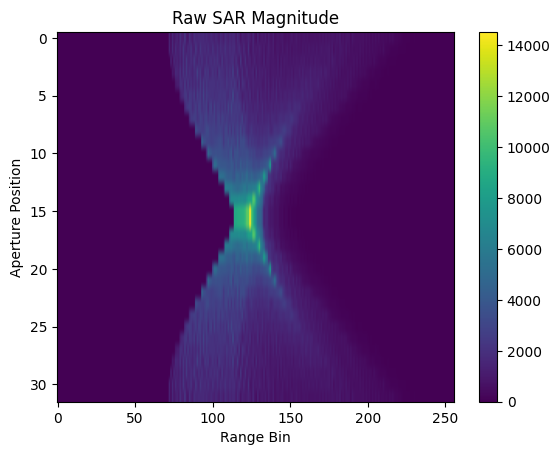

In [ ]:
from wave_data_simulator.sensor_model import RadarSensor
from wave_data_simulator.geometry import FaceGeometry
from wave_data_simulator.mask_model import MaskMaterial
from wave_data_simulator.wave_propagation import StripmapSARSimulator

import matplotlib.pyplot as plt
import numpy as np

sensor = RadarSensor(num_aperture_positions=32)
geometry = FaceGeometry(size=64)
mask = MaskMaterial("cotton")

sim = StripmapSARSimulator(sensor, geometry, mask)

raw_data = sim.simulate()

plt.imshow(np.abs(raw_data), aspect='auto')
plt.title("Raw SAR Magnitude")
plt.xlabel("Range Bin")
plt.ylabel("Aperture Position")
plt.colorbar()
plt.show()


In [ ]:
# PHASE 2

from signal_processing.pipeline import SignalProcessingPipeline
import matplotlib.pyplot as plt
import numpy as np

pipeline = SignalProcessingPipeline(sensor, sim.range_bins)

image, depth = pipeline.run(raw_data)

plt.imshow(np.abs(image), cmap='inferno')
plt.title("Reconstructed SAR Image")
plt.colorbar()
plt.show()

plt.plot(depth)
plt.title("Estimated Depth Profile")
plt.show()
